[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
8/8 [==============================] - 2s 4ms/step - loss: 0.1408
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0280
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0147
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0139
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 11/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 12/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0123
Epoc

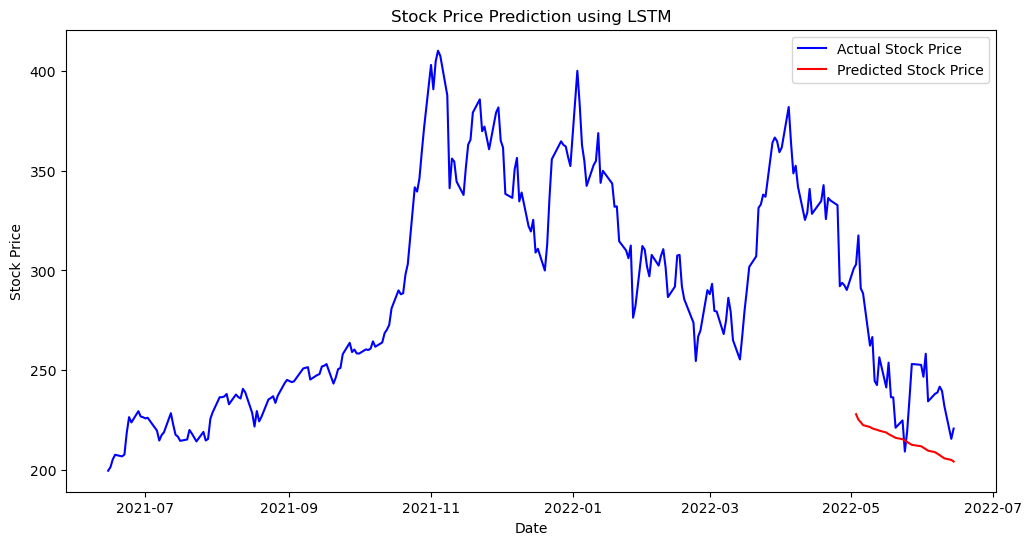

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#Download historical stock price data
def download_stock_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    return df
#Load and preprocess the data
def preprocess_data(df):
    data = df['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    return data, scaler
#Create sequences and labels for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
#Build and train the LSTM model
def build_lstm_model(seq_length):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
#Make predictions and inverse transform
def make_predictions(model, data, scaler, seq_length, num_predictions):
    predictions = []
    for i in range(num_predictions):
        seq = data[-seq_length:]
        pred = model.predict(seq.reshape(1, seq_length, 1))
        data = np.append(data, pred)
        predictions.append(pred)
    predictions = np.array(predictions)
    #Flatten the predictions array and then inverse transform
    predictions = predictions.reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return predictions

#Main function
#Define parameters
symbol = 'TSLA'
start_date = '2021-06-15'
end_date = '2022-06-15'
seq_length = 10
num_predictions = 30
#Step 1: Download historical stock data
df = download_stock_data(symbol, start_date, end_date)
#Step 2: Preprocess the data
data, scaler = preprocess_data(df)
#Step 3: Create sequences and labels for training
X, y = create_sequences(data, seq_length)
#Step 4: Build and train the LSTM model
model = build_lstm_model(seq_length)
model.fit(X, y, epochs=50, batch_size=32)
#Step 5: Make predictions
predictions = make_predictions(model, data, scaler, seq_length, num_predictions)
#Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Stock Price', color='blue')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()